In [1]:
user_ages=["34", "27", "54", "19", "giraffe", "15", "83", "61", "43", "91", "sixteen"]

In [2]:
ages = []
problems = []

for age in user_ages:
    try:
        a = int(age)
        ages.append(a)
    except:
        problems.append(age)

In [3]:
print(ages)
print(problems)

[34, 27, 54, 19, 15, 83, 61, 43, 91]
['giraffe', 'sixteen']


In [4]:
def mean(number_list):
    s = sum(number_list)
    n = len(number_list)
    m = s/n
    return m

In [5]:
numbers=list(range(1, 51))
print(mean(numbers))

25.5


In [6]:
import pandas as pd
import numpy as np

a0 = pd.DataFrame({"StudentID" : [1,2],
                   "GPA_change" : np.random.normal(0,1,2)}) #np.random.normal(0,1,2) pulls 2 random values from a Normal(0,1) distribution
a0

,StudentID,GPA_change
0,1,-0.516672
1,2,2.217791


In [7]:
a1 = pd.DataFrame({"StudentID" : [3,4],
                   "GPA_change" : np.random.normal(0,1,2),
                   "Semester" : ["Spring", "Fall"]})
a1

,StudentID,GPA_change,Semester
0,3,-0.692065,Spring
1,4,-1.784366,Fall


In [8]:
pd.concat([a0,a1],axis=0,ignore_index=True)

,StudentID,GPA_change,Semester
0,1,-0.516672,NaN
1,2,2.217791,NaN
2,3,-0.692065,Spring
3,4,-1.784366,Fall


In [9]:
b0 = pd.DataFrame({"name" : ["Marcos", "Crystal"],
                   "year" : [1993,1996]})
b1 = pd.DataFrame({"name" : ["Crystal", "Marcos"],
                   "proj_num" : [6,3]})

In [10]:
pd.concat([b0,b1], axis=1) 

,name,year,name,proj_num
0,Marcos,1993,Crystal,6
1,Crystal,1996,Marcos,3


In [11]:
pd.merge(b0,b1)

,name,year,proj_num
0,Marcos,1993,3
1,Crystal,1996,6


In [12]:
b3 = pd.DataFrame({"nama_lengkap" : ["Crystal", "Marcos"],
                   "proj_num" : [6,3]})
b3

,nama_lengkap,proj_num
0,Crystal,6
1,Marcos,3


In [13]:
pd.merge(b0,b3, left_on = "name", right_on = "nama_lengkap")

,name,year,nama_lengkap,proj_num
0,Marcos,1993,Marcos,3
1,Crystal,1996,Crystal,6


In [14]:
pd.merge(b0,b1, left_on = "name", right_on = "name")

,name,year,proj_num
0,Marcos,1993,3
1,Crystal,1996,6


In [15]:
b0.merge(b1)

,name,year,proj_num
0,Marcos,1993,3
1,Crystal,1996,6


In [16]:
c0 = pd.DataFrame({"name" : ["Marcos","Crystal","Devin","Lilly"],
                   "year" : [1993,1996,1985,2001]})
c1 = pd.DataFrame({"name" : ["Marcos","Crystal","Devin","Tamera"],
                   "project_num" : [6,3,9,8]})

In [17]:
print (c0, "\n\n", c1)

      name  year
0   Marcos  1993
1  Crystal  1996
2    Devin  1985
3    Lilly  2001 

       name  project_num
0   Marcos            6
1  Crystal            3
2    Devin            9
3   Tamera            8


In [18]:
pd.merge(c0,c1, how="inner")

,name,year,project_num
0,Marcos,1993,6
1,Crystal,1996,3
2,Devin,1985,9


In [19]:
pd.merge(c0,c1, how="left")

,name,year,project_num
0,Marcos,1993,6.0
1,Crystal,1996,3.0
2,Devin,1985,9.0
3,Lilly,2001,NaN


In [20]:
pd.merge(c0,c1, how="right")

,name,year,project_num
0,Marcos,1993.0,6
1,Crystal,1996.0,3
2,Devin,1985.0,9
3,Tamera,NaN,8


In [21]:
pd.merge(c0,c1, how="outer")

,name,year,project_num
0,Crystal,1996.0,3.0
1,Devin,1985.0,9.0
2,Lilly,2001.0,NaN
3,Marcos,1993.0,6.0
4,Tamera,NaN,8.0


In [22]:
raw = pd.DataFrame({"City" : ["Raleigh","Durham","Chapel Hill"],
                    "2000" : np.random.normal(0,1,3).round(2),
                    "2001" : np.random.normal(0,1,3).round(2),
                    "2002" : np.random.normal(0,1,3).round(2),
                    "2003" : np.random.normal(0,1,3).round(2)})
raw

,City,2000,2001,2002,2003
0,Raleigh,-1.68,-0.31,-0.42,0.27
1,Durham,-0.21,0.56,0.26,1.00
2,Chapel Hill,1.60,1.90,0.18,1.19


In [24]:
longer = raw.melt(id_vars = ["City"], value_vars = ["2000","2001","2002","2003"],
        var_name = "Year")
longer

,City,Year,value
0,Raleigh,2000,-1.68
1,Durham,2000,-0.21
2,Chapel Hill,2000,1.60
3,Raleigh,2001,-0.31
4,Durham,2001,0.56
5,Chapel Hill,2001,1.90
6,Raleigh,2002,-0.42
7,Durham,2002,0.26
8,Chapel Hill,2002,0.18
9,Raleigh,2003,0.27


In [25]:
wide_again = longer.pivot(index = "Year", columns = "City", values = "value")  #reset_index moves Year out of the index and back into the DataFrame proper
wide_again = wide_again.reset_index(col_level=1).rename_axis(columns={"City":None})  #cleanup to remove axis names - not always necessary

In [26]:
wide_again

,Year,Chapel Hill,Durham,Raleigh
0,2000,1.60,-0.21,-1.68
1,2001,1.90,0.56,-0.31
2,2002,0.18,0.26,-0.42
3,2003,1.19,1.00,0.27


In [27]:
#Create an empty list for storing chunks.
chunk_list = []

#Read in 1000 rows at a time and store only NC rows as separate chunks in chunk_list.
for chunk in pd.read_csv("CountyHealthData_2014-2015.csv", chunksize=1000, iterator=True):
    nc_rows = chunk[chunk["State"]=="NC"]
    chunk_list.append(nc_rows)

#Combine NC chunks into single data frame and view top rows.
nc_df = pd.concat(chunk_list, ignore_index=True)
nc_df.head(3)

,State,Region,Division,County,FIPS,GEOID,SMS Region,Year,Premature death,Poor or fair health,...,Drug poisoning deaths,Uninsured adults,Uninsured children,Health care costs,Could not see doctor due to cost,Other primary care providers,Median household income,Children eligible for free lunch,Homicide rate,Inadequate social support
0,NC,South,South Atlantic,Alamance County,37001,37001,Region 20,1/1/2014,7123.0,0.192,...,10.48,0.259,0.073,8640.0,0.167,46.0,41394,0.444,4.94,0.202
1,NC,South,South Atlantic,Alamance County,37001,37001,Region 20,1/1/2015,7291.0,0.192,...,12.38,0.249,0.088,9050.0,0.167,56.0,43001,0.455,4.60,NaN
2,NC,South,South Atlantic,Alexander County,37003,37003,Region 20,1/1/2014,7974.0,0.178,...,22.74,0.240,0.077,9316.0,0.205,30.0,39655,0.417,6.27,0.273


In [28]:
import csv

In [29]:
list_of_lists = []
with open("CountyHealthData_2014-2015.csv","r") as csvfile:
    reader=csv.reader(csvfile)
    for row in reader:
        list_of_lists.append(row)

In [30]:
print(list_of_lists[1])

['AK', 'West', 'Pacific', 'Aleutians West Census Area', '2016', '02016', 'Insuff Data', '1/1/2014', '', '0.122', '2.1', '2.1', '', '0.267', '0.3', '7.002', '0.234', '0.896', '0.266', '', '290.7', '21.1', '0.355', '91', '50', '99', '', '', '', '', '0.466', '0.091', '0.087', '', '0.289', '', '322.06', '', '', '0.03', '0.221', '0.272', '0', '5547', '0.078', '1', '0.067', '', '181', '', '', '0.17', '0.075', '', '', '0.374', '0.25', '3791', '0.185', '216', '69192', '0.127', '', '0.287']


In [31]:
list_of_dicts = []
with open("CountyHealthData_2014-2015.csv","r") as csvfile:
    reader=csv.DictReader(csvfile)
    for row in reader:
        list_of_dicts.append(row)

In [32]:
print(list_of_dicts[1])

{'State': 'AK', 'Region': 'West', 'Division': 'Pacific', 'County': 'Aleutians West Census Area', 'FIPS': '2016', 'GEOID': '02016', 'SMS Region': 'Insuff Data', 'Year': '1/1/2015', 'Premature death': '', 'Poor or fair health': '0.122', 'Poor physical health days': '2.1', 'Poor mental health days': '2.1', 'Low birthweight': '0.04', 'Adult smoking': '0.267', 'Adult obesity': '0.329', 'Food environment index': '6.6', 'Physical inactivity': '0.22', 'Access to exercise opportunities': '0.896', 'Excessive drinking': '0.266', 'Alcohol-impaired driving deaths': '', 'Sexually transmitted infections': '288.4', 'Teen births': '21.6', 'Uninsured': '0.293', 'Primary care physicians': '36', 'Dentists': '73', 'Mental health providers': '163', 'Preventable hospital stays': '', 'Diabetic screening': '', 'Mammography screening': '', 'High school graduation': '', 'Some college': '0.474', 'Unemployment': '0.088', 'Children in poverty': '0.076', 'Income inequality': '3.907', 'Children in single-parent house

In [33]:
import numpy as np
import pandas as pd

In [34]:
a_list = [[1,2],[3,4]] #list of ROWS
an_array = np.array(a_list, ndmin = 2)
a_dataframe = pd.DataFrame(a_list)

In [35]:
a_list

[[1, 2], [3, 4]]

In [36]:
an_array

array([[1, 2],
       [3, 4]])

In [37]:
a_dataframe

,0,1
0,1,2
1,3,4


In [38]:
a_list = [[1,"cat"],[3,"dog"]] #list of ROWS
an_array = np.array(a_list, ndmin = 2)
a_dataframe = pd.DataFrame(a_list)

In [39]:
pd.DataFrame(a_list).dtypes

0     int64
1    object
dtype: object

In [40]:
pd.DataFrame(an_array).dtypes

0    object
1    object
dtype: object

In [41]:
np.random.rand(2,2)

array([[0.2862868 , 0.8952317 ],
       [0.13480225, 0.40103516]])

In [42]:
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [43]:
np.ones((4,3,2))

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]])

In [44]:

from sklearn import linear_model, datasets
import matplotlib.pyplot as plt


In [46]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)


Coefficients: 
 [938.23786125]


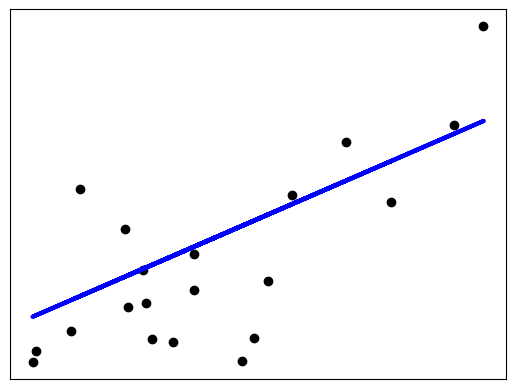

In [47]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [48]:
import sys
import time
import polars as pl
import pandas as pd

# how long does it take Polars to load in a CSV?
start_pl = time.time()
df_pl = pl.read_csv("protest_data.csv")
end_pl = time.time()
print(f'Seconds for Polars to load in the protest data CSV: {end_pl-start_pl}')

# how long does it take Pandas to load in a CSV?
start_pd = time.time()
df_pd= pd.read_csv("protest_data.csv")
end_pd = time.time()
print(f'Seconds for Pandas to load in the protest data CSV: {end_pd-start_pd}')

# how much faster is Polars?
print(f'Polars is {round((end_pd-start_pd)/(end_pl-start_pl), 2)}x faster')

Seconds for Polars to load in the protest data CSV: 0.20700979232788086
Seconds for Pandas to load in the protest data CSV: 0.6058759689331055
Polars is 2.93x faster


In [49]:
# compare the memory size of the Polars and Pandas dataframes
print(f'The Polars dataframe takes up {sys.getsizeof(df_pl)} bytes.')
print(f'The Pandas dataframe takes up {sys.getsizeof(df_pd)} bytes.')

The Polars dataframe takes up 48 bytes.
The Pandas dataframe takes up 28690152 bytes.


In [50]:
import duckdb

duckdb.read_csv("protest_data.csv")
duckdb.sql("SELECT id, country, ccode, year, protest FROM 'protest_data.csv' WHERE YEAR > 2010 LIMIT 10")

┌───────────┬─────────┬───────┬───────┬─────────┐
│    id     │ country │ ccode │ year  │ protest │
│   int64   │ varchar │ int64 │ int64 │  int64  │
├───────────┼─────────┼───────┼───────┼─────────┤
│ 202011001 │ Canada  │    20 │  2011 │       1 │
│ 202012001 │ Canada  │    20 │  2012 │       1 │
│ 202013000 │ Canada  │    20 │  2013 │       0 │
│ 202014000 │ Canada  │    20 │  2014 │       0 │
│ 202015001 │ Canada  │    20 │  2015 │       1 │
│ 202016001 │ Canada  │    20 │  2016 │       1 │
│ 202016002 │ Canada  │    20 │  2016 │       1 │
│ 202016003 │ Canada  │    20 │  2016 │       1 │
│ 202016004 │ Canada  │    20 │  2016 │       1 │
│ 202016005 │ Canada  │    20 │  2016 │       1 │
├───────────┴─────────┴───────┴───────┴─────────┤
│ 10 rows                             5 columns │
└───────────────────────────────────────────────┘

In [51]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
page = urlopen("https://unc-libraries-data.github.io/Python/Intro/Introduction.html")  #The Python 1 materials!
html = page.read()
print(html[:300]) #print only the first 300 characters

b'<!DOCTYPE html>\n<html>\n<head><meta charset="utf-8" />\n\n<title>Introduction</title>\n\n<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.1.10/require.min.js"></script>\n<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js"></script>\n\n\n\n<style type="text/css">\n   '


In [52]:
soup=BeautifulSoup(html,"html.parser")
[x.text for x in soup.find_all("h2")] # find all h2 (second-level headers)

['Why Python?¶',
 'Getting Started¶',
 'Data Types and Variables¶',
 'Flow Control¶',
 'More Data Types¶',
 'Review¶',
 'Pseudocode and Comments¶',
 'User-defined Functions¶',
 'Coming up¶',
 'References and Resources¶']

In [53]:
from noaa_sdk import NOAA
from time import sleep

n = NOAA()
forecast = n.points_forecast(35.9132,-79.0558, type='forecastGridData')
sleep(5) #pause for 5 seconds to prevent repeatedly using the API

<Axes: xlabel='validTime'>

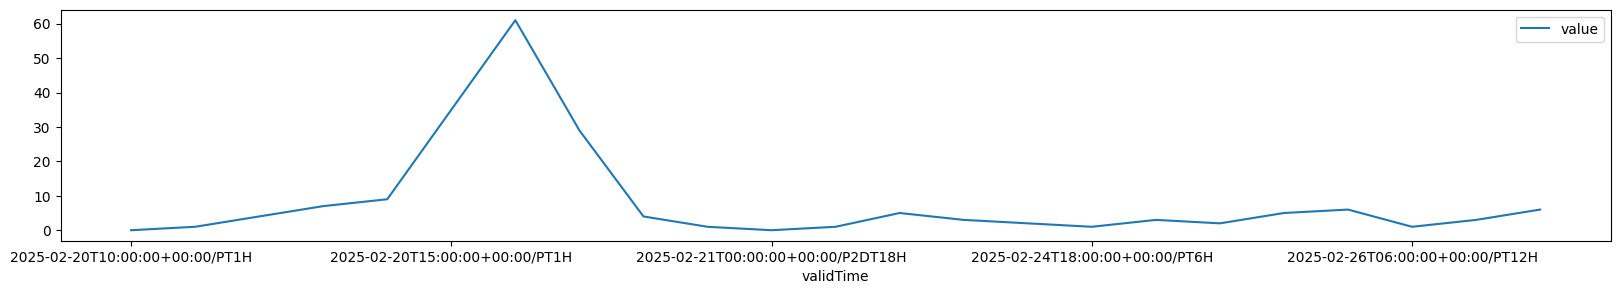

In [54]:
rain_chance = forecast["properties"]["probabilityOfPrecipitation"]["values"]
pd.DataFrame(rain_chance).plot.line(x="validTime",y="value", figsize=(20,3))

In [57]:
import nltk
#the code below is necessary for word_tokenize and parts of speech to work
# nltk.download("punkt_tab")
# nltk.download('averaged_perceptron_tagger_eng')
sentence = "The quick brown fox jumps over the lazy dog."
words = nltk.word_tokenize(sentence)
print(words)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\agung/nltk_data'
    - 'c:\\Users\\agung\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data'
    - 'c:\\Users\\agung\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data'
    - 'c:\\Users\\agung\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\agung\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
nltk.pos_tag(words)

In [ ]:
# nltk.download('tagsets')
# nltk.help.upenn_tagset()

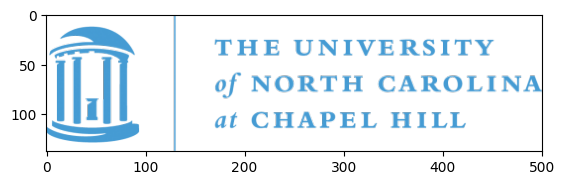

In [58]:
from PIL import Image
from urllib.request import urlretrieve
from matplotlib.pyplot import imshow
from IPython.display import display


#downloading an image locally
urlretrieve("https://identity.unc.edu/wp-content/uploads/sites/885/2019/01/UNC_logo_webblue-e1517942350314.png",
           "UNC_logo.png")

UNC = Image.open("UNC_logo.png")
#note: // divides two numbers and rounds the result down to get an integer
UNC_gray = UNC.convert('LA').resize((UNC.width//2,UNC.height//2))
imshow(UNC)

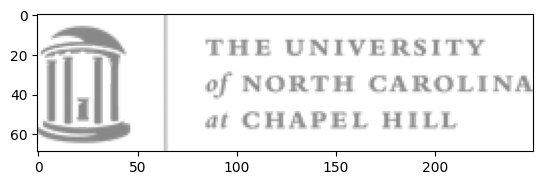

In [59]:
imshow(UNC_gray)